In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import gzip, sys, os

if sys.version_info[0] == 2:
    from urllib import urlretrieve
else:
    from urllib.request import urlretrieve

In [38]:
def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)

def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    # Read the inputs in Yann LeCun's binary format.
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1,784)
    return data / np.float32(256)

In [39]:
## Load the training set
train_data = load_mnist_images('train-images-idx3-ubyte.gz')

In [40]:
# Compute covariance matrix
Sigma = np.cov(train_data, rowvar=0, bias=1)
# Compute coordinate-wise variances, in increasing order
coordinate_variances = np.sort(Sigma.diagonal())
# Compute variances in eigenvector directions, in increasing order
eigenvector_variances = np.sort(np.linalg.eigvalsh(Sigma))

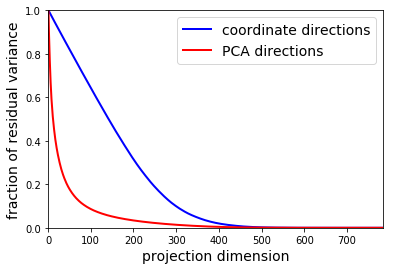

In [41]:
# Compute fraction of overall variance lost when projecting to k coordinate directions
total_coordinate_variance = np.cumsum(coordinate_variances)
total_coordinate_variance = total_coordinate_variance/total_coordinate_variance[783]
# Compute fraction of overall variance lost when projecting to k eigenvector directions
total_eigenvector_variance = np.cumsum(eigenvector_variances)
total_eigenvector_variance = total_eigenvector_variance/total_eigenvector_variance[783]
# Plot these results
plt.plot(np.arange(1,784), total_coordinate_variance[784:0:-1], 'b-', lw=2)
plt.plot(np.arange(1,784), total_eigenvector_variance[784:0:-1], 'r-', lw=2)
plt.xlabel('projection dimension', fontsize=14)
plt.ylabel('fraction of residual variance', fontsize=14)
plt.xlim(0,784)
plt.ylim(0.0,1.0)
plt.legend(['coordinate directions', 'PCA directions'], fontsize=14)
plt.show()

In [45]:
eigenvalues, eigenvectors = np.linalg.eigh(Sigma)

In [13]:
#Let U be the 784-by-k matrix whose columns are the top k eigenvectors. Then:

#the matrix transpose(U) performs the PCA projection onto the top k directions
#the matrix U reconstructs a point in the original space from its k dimensional projection
#Thus the product U*transpose(U) is a 784-by-784 matrix that does a projection-followed-by-reconstruction. The following function returns this matrix for any specified k.

In [46]:
# Function that returns the project-and-reconstruct operations as a single matrix
def projection_and_reconstruction(k):
    U = eigenvectors[:,(784-k):784]
    P = np.dot(U,U.T)
    return P

In [47]:
def show_digit(x):
    # Make sure all entries of x are in the range [0,255]
    for i in range(784):
        x[i] = max(0.0, x[i])
        x[i] = min(255.0, x[i])
    # Now display
    plt.axis('off')
    plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray)
    plt.show()
    return

In [48]:
def show_effect_of_PCA(x, k_list):
    print ("Original:")
    show_digit(x)
    for k in k_list:
        if (k > 0) and (k < 784):
            print ("Projection to dimension "), k
            P = projection_and_reconstruction(k)
            show_digit(P.dot(x))

Original:


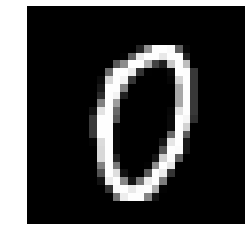

Projection to dimension 


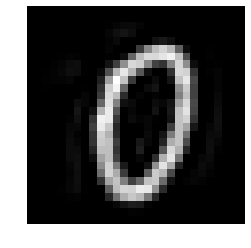

Projection to dimension 


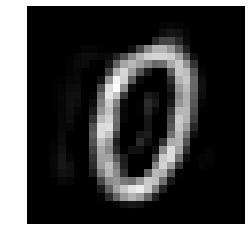

Projection to dimension 


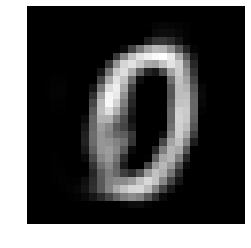

Projection to dimension 


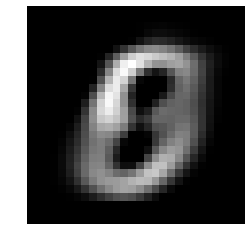

In [32]:
index = 1000
show_effect_of_PCA(train_data[index,], [100, 50, 25, 10])